# Analiza podatkov

V tej datoteki bom analizirala podatke, pridobljene s spletne strani myanimelist.net.

Ne pozabi spisati markdown blokov in README.md datoteke :)

In [13]:
import pandas as pd

pd.set_option("display.max_rows", 10)

%matplotlib inline 

ANIME = pd.read_csv("anime.csv", index_col="id") 
VSI_ANIME = pd.read_csv("vsi_anime.csv", index_col="id")
LIKI = pd.read_csv("liki.csv", index_col="id_lika")

In [4]:
VSI_ANIME

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
2225,Alps no Shoujo Heidi,52,winter,1974,Book,25,7.38,38764,NG,['Historical'],['Drama'],['Nippon Animation']
2253,Mazinger Z,92,winter,1974,Manga,25,7.26,18722,Shounen,['Mecha'],"['Action', 'Drama', 'Sci-Fi']",['Toei Animation']
1661,Cutie Honey,25,winter,1974,Manga,25,6.40,17653,NG,['School'],"['Action', 'Sci-Fi', 'Ecchi']",['Toei Animation']
311,Ace wo Nerae!,26,winter,1974,Manga,24,7.07,14326,Shoujo,['School'],"['Drama', 'Romance', 'Sports']",['Tokyo Movie Shinsha']
2389,Kagaku Ninja-tai Gatchaman,105,winter,1974,Original,26,6.93,10938,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
57609,Megumi no Daigo: Kyuukoku no Orange Recaps,2,fall,2023,Manga,23,5.82,1064,Shounen,"['Adult Cast', 'Workplace']","['Action', 'Drama']",['Brain&#039;s Base']
57167,Princess Principal: Crown Handler Movie 3 - Co...,1,fall,2023,Original,8,6.65,911,NG,['Historical'],['Mystery'],['Actas']
57603,Suki na Ko ga Megane wo Wasureta Short Episode...,3,fall,2023,Manga,0,6.01,758,NG,"['Romantic Subtext', 'School']",['Comedy'],['GoHands']


Splošno

In [ ]:
# Nekrižane: Ocene po številih zaokroženih, ocene po letih, najboljših nekaj
# Ocene po izvornem, demografika, žanri, najpopularnejše teme, studii, popularnost križana s characterji, demo, žanri. Franšize.
# Kakšni cross-reference-i npr. demografika-žanri-nekaj. Pač nekaj drugega med sabo kot le ocena. Število epizod v franšizi ... (sam zato nimam dost podatkov ...)

In [9]:
print(float(VSI_ANIME["ocena"].mean())) #Kako se neupoštevajo NaN?

6.678904647509933


In [33]:
filter_nan = VSI_ANIME["ocena"].notna()
ocene = VSI_ANIME[filter_nan]
print(sum(filter_nan))
ocene

21646


,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
2225,Alps no Shoujo Heidi,52,winter,1974,Book,25,7.38,38764,NG,['Historical'],['Drama'],['Nippon Animation']
2253,Mazinger Z,92,winter,1974,Manga,25,7.26,18722,Shounen,['Mecha'],"['Action', 'Drama', 'Sci-Fi']",['Toei Animation']
1661,Cutie Honey,25,winter,1974,Manga,25,6.40,17653,NG,['School'],"['Action', 'Sci-Fi', 'Ecchi']",['Toei Animation']
311,Ace wo Nerae!,26,winter,1974,Manga,24,7.07,14326,Shoujo,['School'],"['Drama', 'Romance', 'Sports']",['Tokyo Movie Shinsha']
2389,Kagaku Ninja-tai Gatchaman,105,winter,1974,Original,26,6.93,10938,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
55802,The iDOLM@STER Cinderella Girls: U149 Special,1,fall,2023,Web manga,25,7.33,1568,NG,"['Idols (Female)', 'Music']",[],['CygamesPictures']
57609,Megumi no Daigo: Kyuukoku no Orange Recaps,2,fall,2023,Manga,23,5.82,1064,Shounen,"['Adult Cast', 'Workplace']","['Action', 'Drama']",['Brain&#039;s Base']
57167,Princess Principal: Crown Handler Movie 3 - Co...,1,fall,2023,Original,8,6.65,911,NG,['Historical'],['Mystery'],['Actas']


In [43]:
def zaokrozi(x):
    return round(x, 1)

zaokrozena_ocena = ocene["ocena"].apply(zaokrozi)  #Bolj elegantna rešitev?
zaokrozena_ocena

id
2225     7.4
2253     7.3
1661     6.4
311      7.1
2389     6.9
        ... 
55802    7.3
57609    5.8
57167    6.7
57603    6.0
56743    6.3
Name: ocena, Length: 21646, dtype: float64

In [46]:
podtabela = ocene[["naslov", "leto premiere", "ocena"]].copy()
podtabela["zaokrožena ocena"] = zaokrozena_ocena
podtabela

,naslov,leto premiere,ocena,zaokrožena ocena
id,,,,
2225,Alps no Shoujo Heidi,1974,7.38,7.4
2253,Mazinger Z,1974,7.26,7.3
1661,Cutie Honey,1974,6.40,6.4
311,Ace wo Nerae!,1974,7.07,7.1
2389,Kagaku Ninja-tai Gatchaman,1974,6.93,6.9
...,...,...,...,...
55802,The iDOLM@STER Cinderella Girls: U149 Special,2023,7.33,7.3
57609,Megumi no Daigo: Kyuukoku no Orange Recaps,2023,5.82,5.8
57167,Princess Principal: Crown Handler Movie 3 - Co...,2023,6.65,6.7


In [48]:
po_ocenah = podtabela.groupby("zaokrožena ocena").size()
po_ocenah

zaokrožena ocena
1.9     1
2.2     1
2.3     1
2.4     1
2.6     3
       ..
8.8    35
8.9    36
9.0    35
9.1    12
9.3     1
Length: 70, dtype: int64

<Axes: xlabel='zaokrožena ocena'>

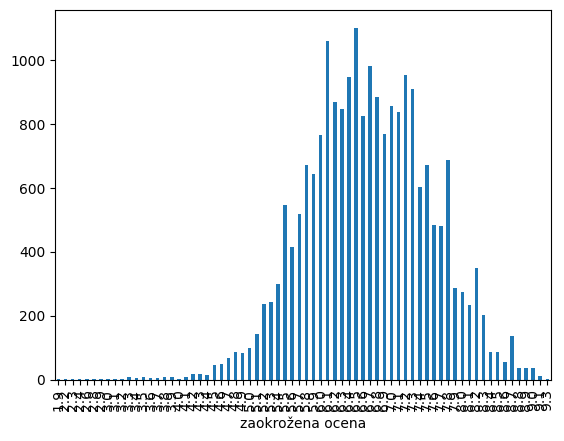

In [49]:
po_ocenah.plot.bar() #Dam na manj? Na koliko manj?  Ali lahko razširim graf?